## Naive Bayes

**Naive Bayes** is one of the simplest Machine learning algorithm for classification. Despite its simplicity its pretty effective for some type of classification tasks. **Naive Bayes** classifiers can be extremely fast compared to most other classification methods.

In [1]:
#Lets use sklearn to train Guassian NB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02, plotDecisionSurface=True):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    if plotDecisionSurface:
        # plot the decision surface
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [3]:
#import iris dataset
from sklearn import datasets

iris = datasets.load_iris()
#load only two features
X = iris.data[:,[2,3]]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_test:', np.bincount(y_test))
print('Labels counts in y_train:', np.bincount(y_train))

Labels counts in y: [50 50 50]
Labels counts in y_test: [15 15 15]
Labels counts in y_train: [35 35 35]


In [4]:
#Standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [5]:
#Lets apply GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_gnb_train_pred = gnb.fit(X_train_std, y_train).predict(X_train_std)
y_gnb_test_pred = gnb.predict(X_test_std)

In [6]:
print("Theta =", gnb.theta_)
print("Sigma =", gnb.sigma_)

Theta = [[-1.30082725 -1.25109721]
 [ 0.27036385  0.1648152 ]
 [ 1.0304634   1.08628201]]
Sigma = [[0.01160434 0.01304885]
 [0.06351661 0.07178269]
 [0.09777608 0.14275158]]


<ipython-input-2-fd12fa515296>:34: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],
<ipython-input-7-764325a25a3c>:7: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  plt.axis(fontsize=20)


Text(0.5, 1.0, 'GNB')

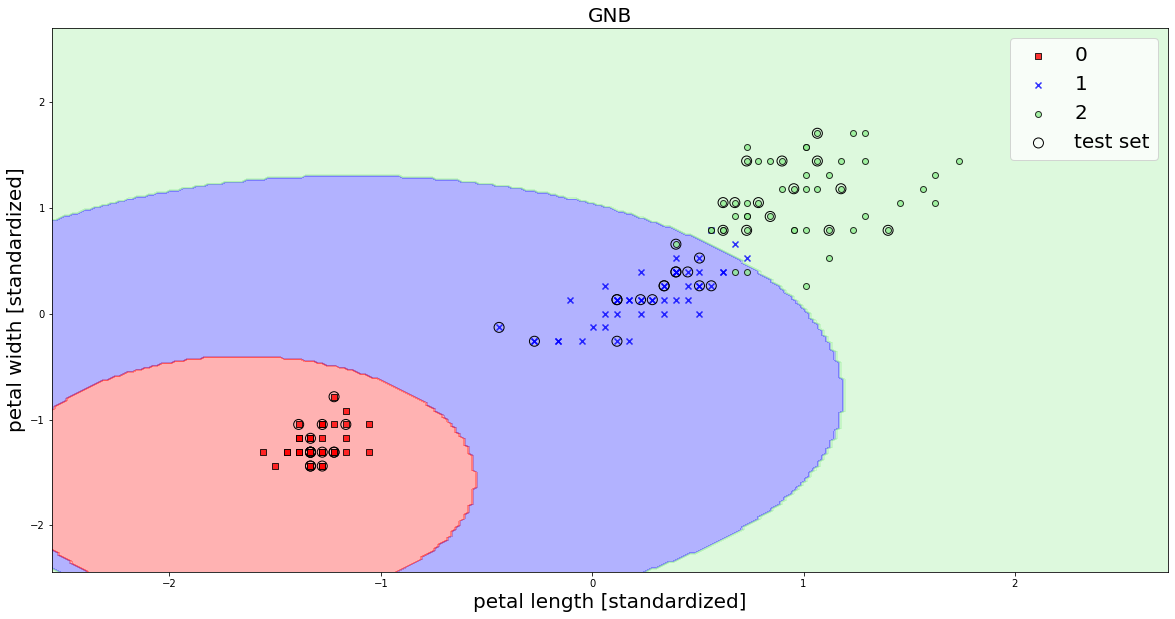

In [7]:
#Plot the decision boundary
plt.figure(figsize=(20,10))
plot_decision_regions(X_combined_std, y_combined, classifier=gnb, test_idx=range(105,150))
plt.xlabel('petal length [standardized]', fontsize=20)
plt.ylabel('petal width [standardized]', fontsize=20)
plt.legend(fontsize=20)
plt.axis(fontsize=20)
plt.title('GNB', fontsize=20)

#### Now lets implement GaussianNB by hand.

**Bayes** theorem says that $P(y|x_1,x_2,x_3...x_n) = \frac{P(y)P(x_1,x_2,...x_n|y)}{P(x_1,...x_n)}$

Using Naive conditional independence assumption. 
$P(y|x_1,x_2,x_3...x_n) = \frac{c}{P(x_1,...x_n)}$

Classification rule becomes $\hat{y} = \text{arg } \underset{y}{\text{max}} \text{ } P(y)\prod_{i=1}^nP(x_i|y)$.
For **Gaussian Naive Bayes** 

$P(x_i|y) = \frac{1}{\sqrt{2\pi\sigma_y^2}} \text{exp} \left ( - \frac{(x_i-\mu_y)^2}{2\sigma_y^2} \right )$

Where $\mu_y$ is the mean of $x_i$ for class $y$, and $\sigma_y$ is the standard deviation of $x_i$ for class $y$.

In [8]:
class GaussianNB():
 
    def fit(self,X,y):
        NClasses = np.unique(y).shape[0]
        self.theta_ = []
        self.sigma_ = []
        for e in np.unique(y):
            x_i = X[y==e]
            self.theta_.append(np.mean(x_i, axis=0))
            self.sigma_.append(np.square(np.std(x_i, axis=0)))
        
    def predict(self,X):
        NClasses = len(self.theta_)
        y_prob = np.zeros(shape=(X.shape[0], NClasses))
        for idx in range(NClasses):
            y_prob[:,idx] = np.prod(np.exp(-np.square(X-self.theta_[idx])/(2.0 * self.sigma_[idx]))/(np.sqrt(self.sigma_[idx])), axis=1)
        return np.argmax(y_prob, axis=1)

In [9]:
myGnb = GaussianNB()
myGnb.fit(X_train_std, y_train)
print("Theta =", myGnb.theta_)
print("Sigma =", myGnb.sigma_)

Theta = [array([-1.30082725, -1.25109721]), array([0.27036385, 0.1648152 ]), array([1.0304634 , 1.08628201])]
Sigma = [array([0.01160434, 0.01304885]), array([0.06351661, 0.07178269]), array([0.09777607, 0.14275158])]


<ipython-input-2-fd12fa515296>:34: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],
<ipython-input-10-2d7e555a88af>:7: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  plt.axis(fontsize=20)


Text(0.5, 1.0, 'MyGNB')

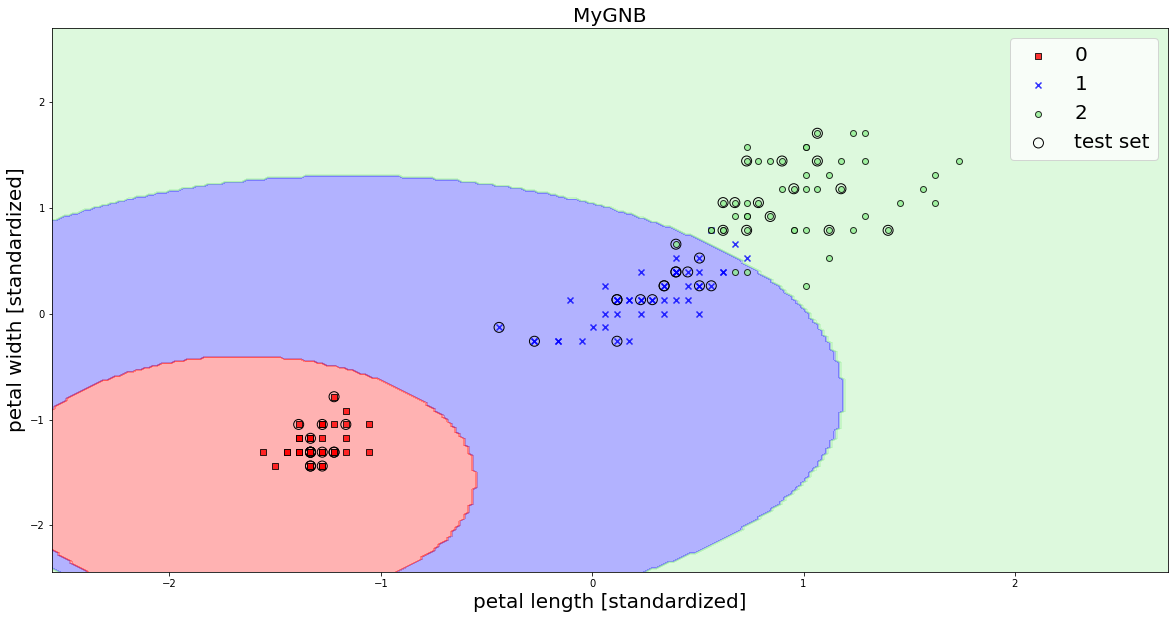

In [10]:
#Plot the decision boundary
plt.figure(figsize=(20,10))
plot_decision_regions(X_combined_std, y_combined, classifier=myGnb, test_idx=range(105,150))
plt.xlabel('petal length [standardized]', fontsize=20)
plt.ylabel('petal width [standardized]', fontsize=20)
plt.legend(fontsize=20)
plt.axis(fontsize=20)
plt.title('MyGNB', fontsize=20)